In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree



# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys


sys.path.append(os.path.abspath("../../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [2]:
df_encoded=pd.read_csv("..\..\..\datos\datos0\datos_clusterizados0_escalado.csv", index_col=0)

In [3]:
df_encoded.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_robust,Country_robust,Category_robust,Sub-Category_robust,Discount_robust
0,544.75,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.79,0.97,1.11,1.19,0.00
1,525.91,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.11,-0.14,1.11,1.19,0.00
2,520.49,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.91,0.97,1.11,1.19,0.00
3,534.17,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74,0.90,0.00,1.62,0.00
4,280.87,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.14,-0.06,1.00,2.29,0.25


Separamos en x e y

In [4]:
x= df_encoded.drop(columns="Sales_unitario")
y= df_encoded[["Sales_unitario"]]

Separamos en train y test y le hacemos aprender

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [6]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

***K-Fold***

In [7]:
f.metricas(y_train, y_train_pred, y_test, y_test_pred)

,train,test
r2_score,0.45,0.46
MAE,43.98,44.76
MSE,"5,478.05","5,468.25"
RMSE,74.01,73.95


In [8]:
kf= KFold(n_splits=5,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

0.450244005251587

In [9]:
score_mae= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_absolute_error")
abs(np.mean(score_mae))

44.60529194700418

In [10]:
score_mse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_mean_squared_error")
abs(np.mean(score_mse))

5522.526751556722

In [11]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

74.25702445159168

In [12]:
kf= KFold(n_splits=200,
          shuffle=True,
          random_state=42)

score_r2= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "r2")
np.mean(score_r2)

0.4280936500080878

In [13]:
score_rmse= cross_val_score(modelo_lineal, x, y, cv=kf, scoring= "neg_root_mean_squared_error")
abs(np.mean(score_rmse))

71.77830859333869

**Como seleccionar que variables independientes eliminar si sucede over fitting**

In [14]:

df_coefs=pd.DataFrame(modelo_lineal.coef_, columns= x.columns).T
df_coefs.sort_values(by=0, key= abs, ascending=False)    #para que ordene según la importancia

,0
Ship Mode_Second Class,"849,025,231,365,346.88"
Ship Mode_Standard Class,"849,025,231,365,345.38"
Ship Mode_Same Day,"849,025,231,365,343.12"
Ship Mode_First Class,"849,025,231,365,341.12"
Segment_Home Office,"24,116,945,359,490.15"
Segment_Consumer,"24,116,945,359,489.31"
Segment_Corporate,"24,116,945,359,487.81"
month_November,"4,154,634,481,985.72"
month_August,"4,154,634,481,985.57"
month_May,"4,154,634,481,984.57"


### Como ya me di cuenta de que no parece ser una relación lineal paso a decision tree

**DECISION TREE**  
Separa los datos en nodos y luego hace la media en el nodo final de la variable dependiente para los datos que se encuentran en ese nodo y cuando tenga que predecir, si el dato acaba en ese nodo, se le aplicará esa media como valor de su variable dependiente.  
   
***Para elegir el mejor árbol de decisión (conformado de unas variables independientes concretas)***   
Calcula la suma de los errores al cuadrado dividido entre n del nodo final de cada arbol y compara ese error y se queda con el que tenga el error mínimo
  
- Si hay mucha profundidad, los nodos finales van a ser tan específicos que se va a dar over fitting
  
***Como decirle que pare de dividir para evitar el Over Fitting***  
- max_depth (profundida máxima del árbol)
- min_sample_split (numero de datos minimo en el nodo (madre) para que se pueda dividir)  
- min_sample_leaf (numero de datos minimo que tienen que tener los nodos(hijos) en los que me divido) 
- max_leaf_nodes (numero maximo de nodos que quiero que tenga mi arbol)  
- max_features (numero máximo de variables independientes que queremos)

Pruebo primero a ver cómo me lo hace 

In [15]:
modelo_arbol_vacio= DecisionTreeRegressor()         
modelo_arbol_vacio.fit(x_train, y_train)
y_pred_test_arb_vacio= modelo_arbol_vacio.predict(x_test)
y_pred_train_arb_vacio= modelo_arbol_vacio.predict(x_train)
df_metricas_arbol_vacio= f.metricas(y_train, y_pred_train_arb_vacio, y_test, y_pred_test_arb_vacio)
df_metricas_arbol_vacio

,train,test
r2_score,0.99,0.01
MAE,1.41,50.39
MSE,117.66,"9,953.44"
RMSE,10.85,99.77


Dejándole a él sólo me da que se produce overfitting

In [28]:
# Parámetros a evaluar
params_arbol = {
    'max_depth': [3, 5, 7,200],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 200]
}

grid_search_arbol=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol, cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 200],
                         'max_leaf_nodes': [4, 6, 8, 10, 20, 200],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [29]:
modelo_final_arbol=grid_search_arbol.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=200, min_samples_leaf=50,
                      min_samples_split=10)

In [30]:
y_pred_test_arb= modelo_final_arbol.predict(x_test)
y_pred_train_arb= modelo_final_arbol.predict(x_train)
df_metricas_arbol= f.metricas(y_train, y_pred_train_arb, y_test, y_pred_test_arb)
df_metricas_arbol=df_metricas_arbol.T
df_metricas_arbol.reset_index(inplace=True)
df_metricas_arbol



,index,r2_score,MAE,MSE,RMSE
0,train,0.50,38.40,"5,048.97",71.06
1,test,0.47,39.88,"5,326.05",72.98


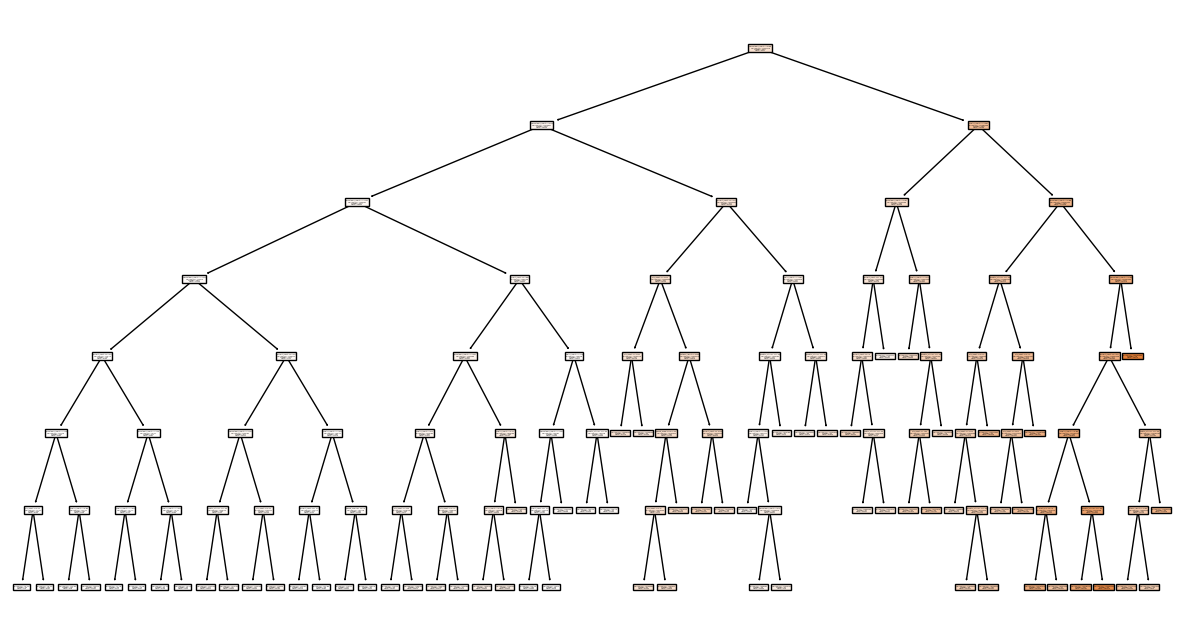

In [31]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol, feature_names=x.columns, filled=True);

### **Este es el modelo inicial sobre el que cambiar los parametros para mejorar las métricas y por ende el modelo**

### Vamos a graficarlo porque así se entienden mejor

In [32]:
df_resultados_arbol=pd.DataFrame(grid_search_arbol.cv_results_)

In [33]:
df_resultados_arbol.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
278,0.03,0.00,0.02,0.02,7,200,50,100,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...","-4,987.96","-5,080.79","-5,223.91","-6,752.72","-4,889.19","-5,386.92",691.75,1
277,0.05,0.01,0.01,0.00,7,200,50,50,"{'max_depth': 7, 'max_leaf_nodes': 200, 'min_s...","-4,987.96","-5,080.79","-5,223.91","-6,752.72","-4,889.19","-5,386.92",691.75,1


In [34]:
df_resultados_arbol.shape   #no da el número de modelos que ha generado el árbol 

(384, 17)

In [35]:
df_resultados_arbol_filtrado=df_resultados_arbol.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado["MSE"]= df_resultados_arbol["mean_test_score"]
df_resultados_arbol_filtrado.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,3,4,10,10,"-5,903.42"
1,3,4,10,50,"-5,903.42"
2,3,4,10,100,"-5,903.42"
3,3,4,10,200,"-5,903.42"
4,3,4,50,10,"-5,903.42"


In [36]:
df_rmse_profun= np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun.head()

,param_max_depth,MSE
0,3,75.37
1,5,74.84
2,7,74.85
3,200,74.93


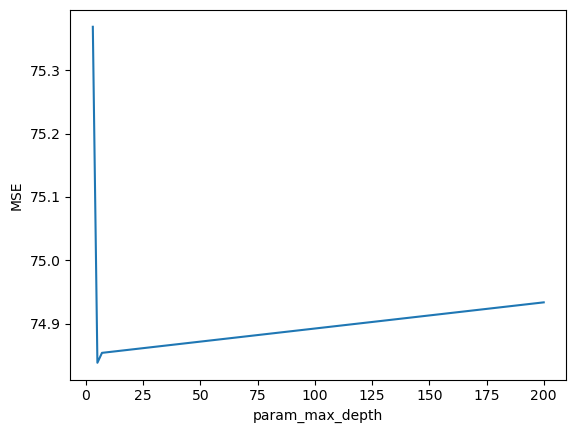

In [37]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun);

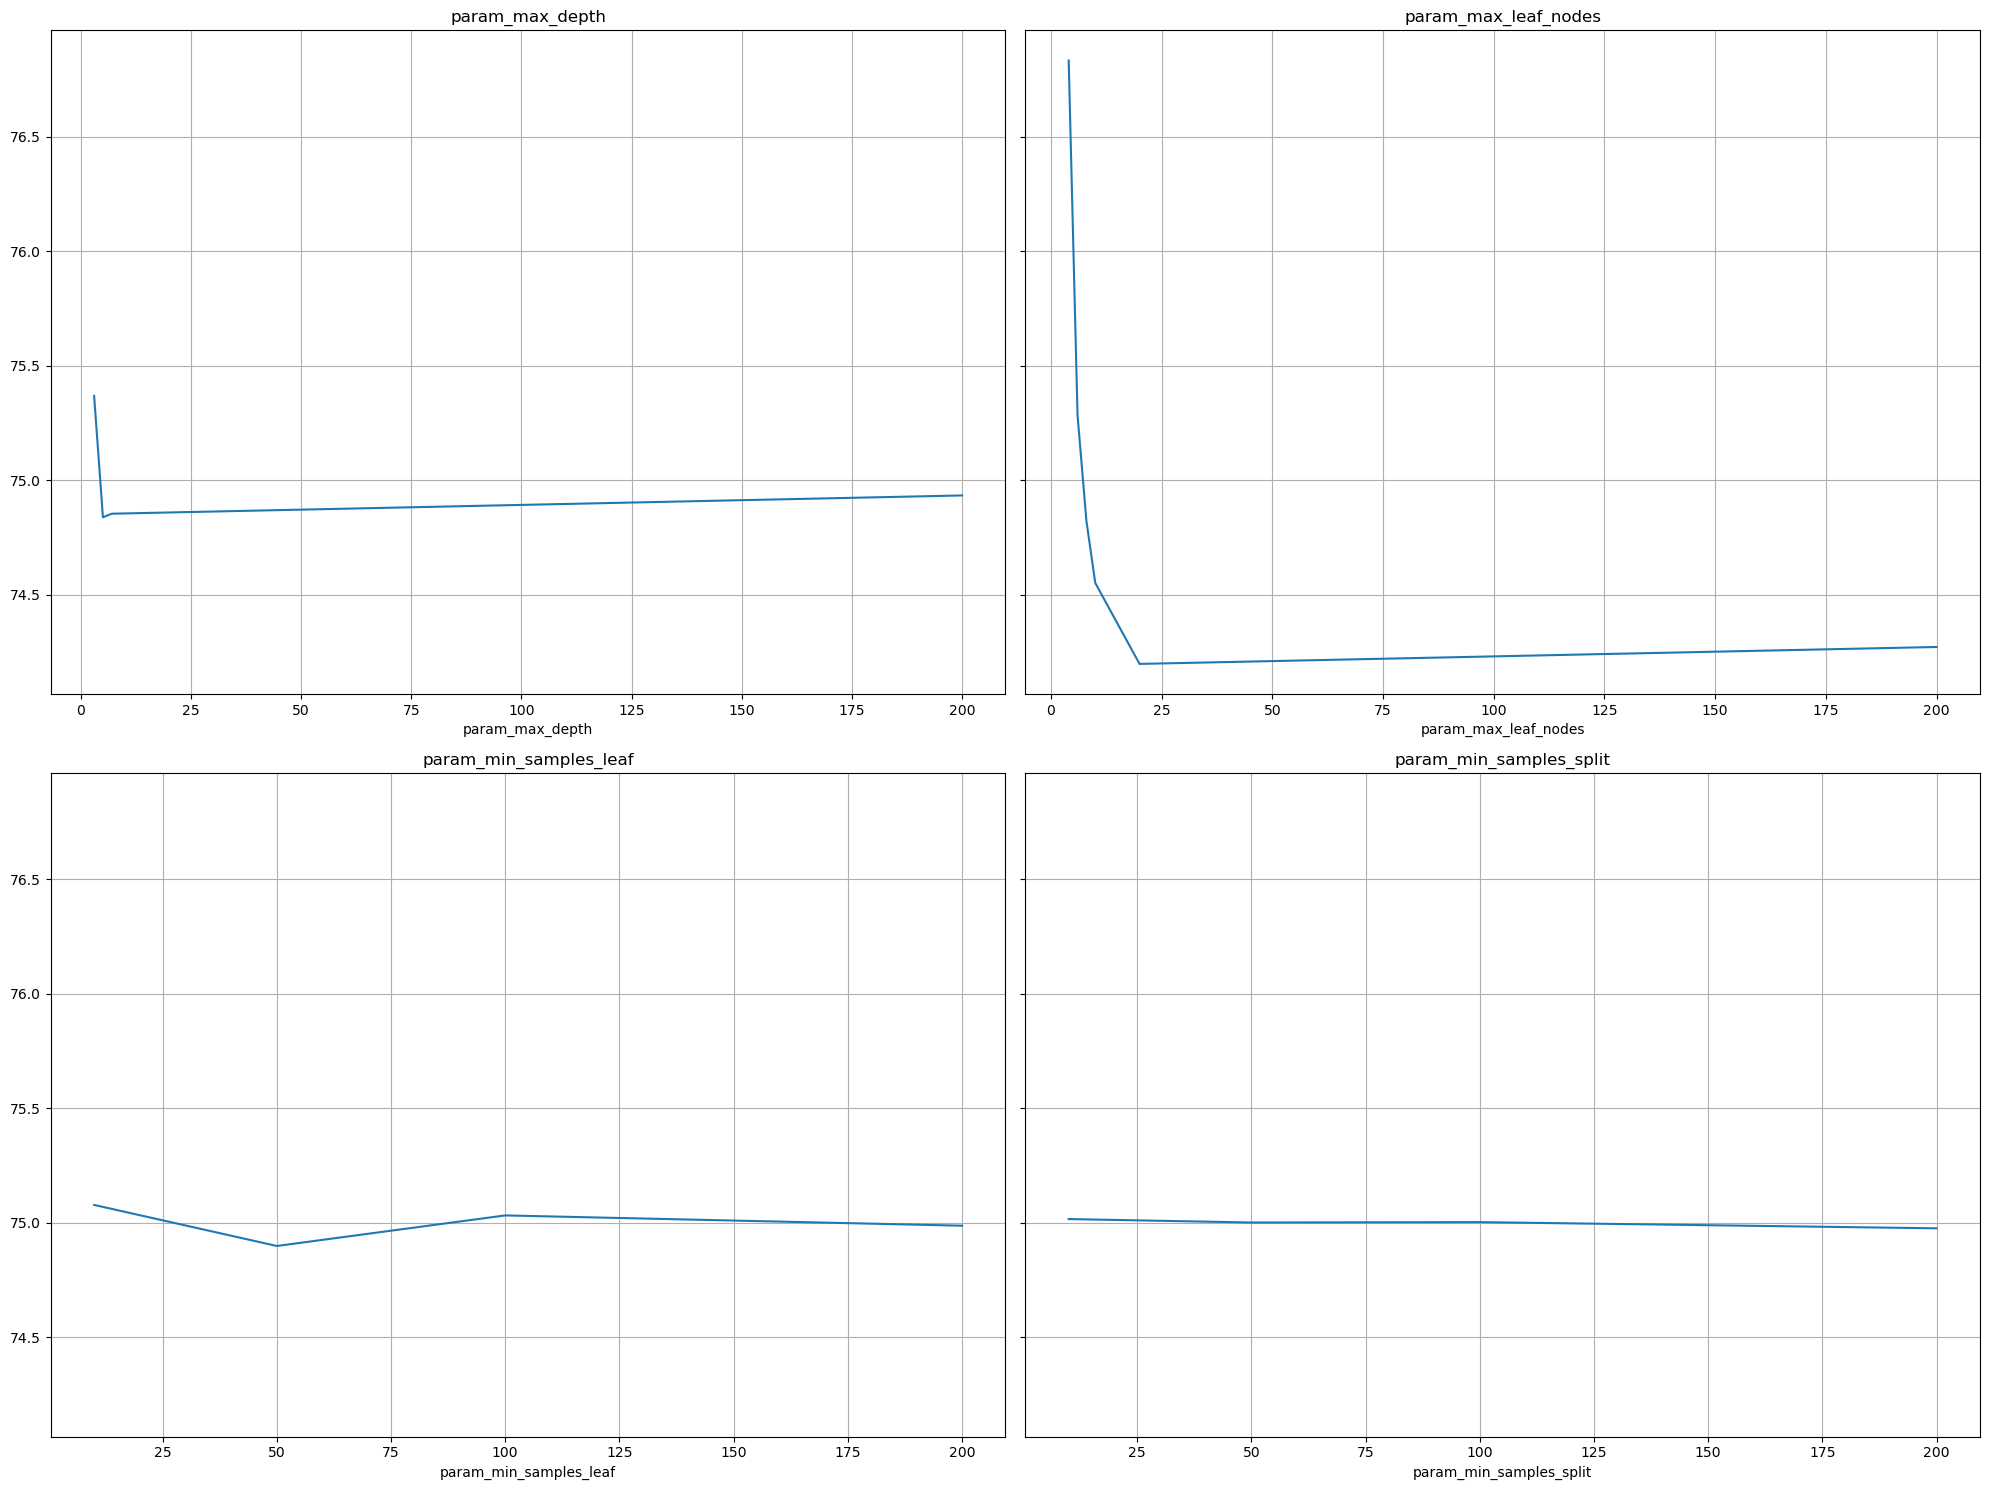

In [38]:

df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [39]:
pd.DataFrame(modelo_final_arbol.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False)

,Importancia
Sub-Category_robust,0.81
Country_robust,0.12
Discount_robust,0.03
City_robust,0.01
Quantity_entre 1 y 2,0.01
Quantity_entre 5 y 6,0.00
month_June,0.00
Category_robust,0.00
Quantity_entre 3 y 4,0.00
Segment_Home Office,0.00


## Lo pruebo cambiando parametros

In [88]:
# Parámetros a evaluar
params_arbol_prueba = {
    'max_depth': [6,7,8],
    'min_samples_split': [5,6,7,8,9,10],
    'min_samples_leaf': [30,50,60,70,80],
    'max_leaf_nodes': [100,150, 190]
}

grid_search_arbol_prueba=GridSearchCV(DecisionTreeRegressor(), param_grid=params_arbol_prueba , cv=5, scoring= "neg_mean_squared_error", n_jobs=-1)

grid_search_arbol_prueba.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8],
                         'max_leaf_nodes': [100, 150, 190],
                         'min_samples_leaf': [30, 50, 60, 70, 80],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [89]:
modelo_final_arbol_prueba=grid_search_arbol_prueba.best_estimator_  #para ver el mejor arbol que me ha elegido
modelo_final_arbol_prueba

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=100, min_samples_leaf=60,
                      min_samples_split=5)

In [90]:
y_pred_test_arb_prueba= modelo_final_arbol_prueba.predict(x_test)
y_pred_train_arb_prueba= modelo_final_arbol_prueba.predict(x_train)
df_metricas_arbol_prueba= f.metricas(y_train, y_pred_train_arb_prueba, y_test, y_pred_test_arb_prueba)

df_metricas_arbol_prueba=df_metricas_arbol_prueba.T
df_metricas_arbol_prueba.reset_index(inplace=True)
df_metricas_arbol_prueba

,index,r2_score,MAE,MSE,RMSE
0,train,0.49,38.99,"5,132.66",71.64
1,test,0.49,39.50,"5,164.40",71.86


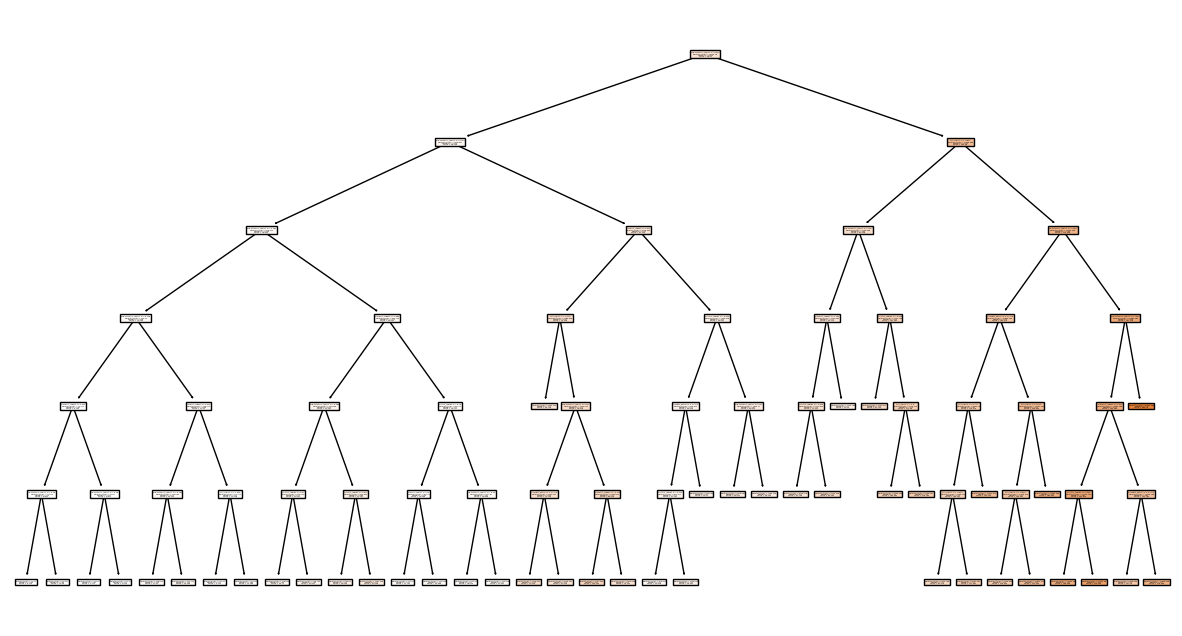

In [91]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=modelo_final_arbol_prueba, feature_names=x.columns, filled=True);

### Vamos a graficarlo porque así se entienden mejor

In [92]:
df_resultados_arbol_prueba=pd.DataFrame(grid_search_arbol_prueba.cv_results_)

In [93]:
df_resultados_arbol_prueba.sort_values(by= "rank_test_score", ascending=True).head(2)    #aquí podemos ver cual nos ha dado como mejor modelo (el 1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
43,0.04,0.01,0.02,0.01,6,150,60,6,"{'max_depth': 6, 'max_leaf_nodes': 150, 'min_s...","-5,061.43","-5,076.68","-5,217.01","-6,680.05","-4,817.23","-5,370.48",667.30,1
42,0.05,0.02,0.01,0.00,6,150,60,5,"{'max_depth': 6, 'max_leaf_nodes': 150, 'min_s...","-5,061.43","-5,076.68","-5,217.01","-6,680.05","-4,817.23","-5,370.48",667.30,1


In [94]:
df_resultados_arbol_prueba.shape   #no da el número de modelos que ha generado el árbol 

(270, 17)

In [95]:
df_resultados_arbol_filtrado_prueba=df_resultados_arbol_prueba.filter(like= "param").drop(columns= "params")
df_resultados_arbol_filtrado_prueba["MSE"]= df_resultados_arbol_prueba["mean_test_score"]
df_resultados_arbol_filtrado_prueba.head()


,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,6,100,30,5,"-5,448.95"
1,6,100,30,6,"-5,450.54"
2,6,100,30,7,"-5,448.95"
3,6,100,30,8,"-5,448.95"
4,6,100,30,9,"-5,448.95"


In [96]:
df_rmse_profun_prueba= np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs()).reset_index()
df_rmse_profun_prueba.head()

,param_max_depth,MSE
0,6,73.54
1,7,73.53
2,8,73.65


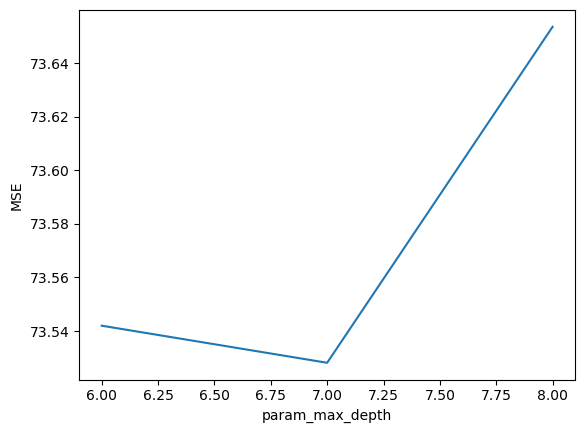

In [97]:
sns.lineplot(x= "param_max_depth", y = "MSE", data= df_rmse_profun_prueba);

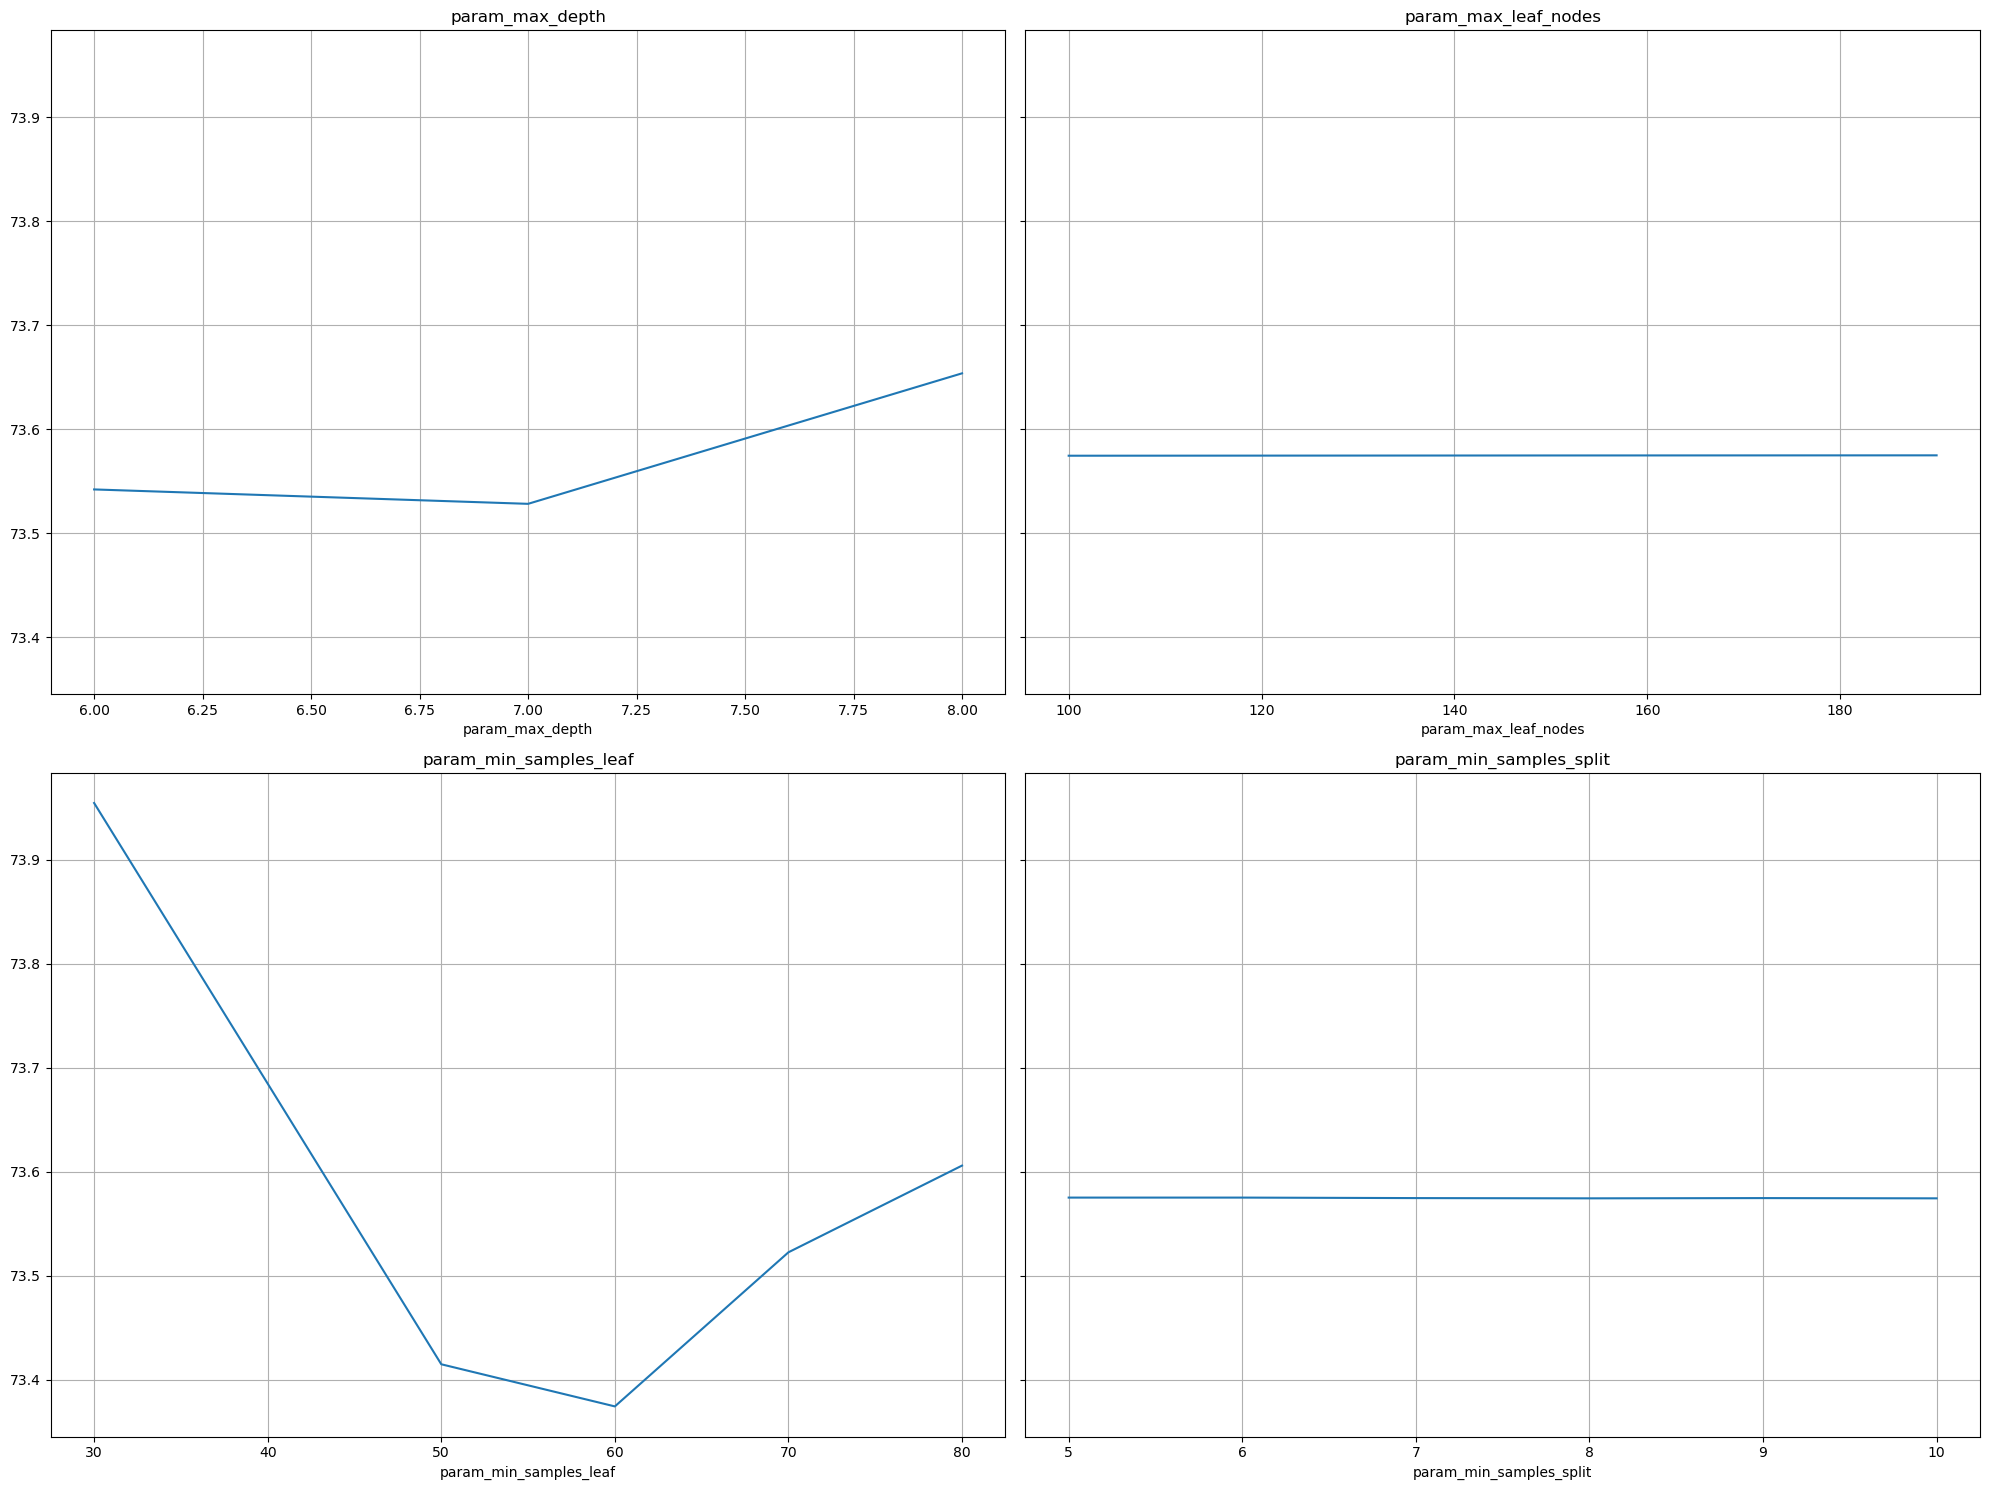

In [98]:

df_rmse_profun_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby("param_max_depth")["MSE"].mean().abs())
df_rmse_profun_prueba = pd.DataFrame(df_rmse_profun_prueba).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 15), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado_prueba.columns[:-1]):
    df_rmse_col_prueba = np.sqrt(df_resultados_arbol_filtrado_prueba.groupby(column)["MSE"].mean().abs())
    sns.lineplot(x=df_rmse_col_prueba.index, y=df_rmse_col_prueba.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)
plt.tight_layout()
plt.show() 

In [99]:
pd.DataFrame(modelo_final_arbol_prueba.feature_importances_, columns= ["Importancia"], index= x.columns).sort_values(by = "Importancia", ascending=False).head()

,Importancia
Sub-Category_robust,0.83
City_robust,0.12
Discount_robust,0.03
Country_robust,0.01
Quantity_entre 1 y 2,0.01


**probamos una última combinación de parametros para el modelo**

PARA PODER COMPARAR MEJOR LOS MODELOS

In [134]:
dicc={0: "modelo1",
      1: "modelo1",
      2: "modelo2",
      3: "modelo2"}

In [135]:
df_final=pd.DataFrame()
df_final=pd.concat([df_final,df_metricas_arbol,df_metricas_arbol_prueba], axis=0, ignore_index=True)
df_final.reset_index(inplace=True)
df_final["level_0"]=df_final["level_0"].map(dicc)
df_final['diff_r2_score'] = df_final.groupby('level_0')['r2_score'].transform(lambda x: x.iloc[0] - x.iloc[1])
df_final['diff_RMSE'] = df_final.groupby('level_0')['RMSE'].transform(lambda x: x.iloc[0] - x.iloc[1])

df_final

,level_0,index,r2_score,MAE,MSE,RMSE,diff_r2_score,diff_RMSE
0,modelo1,train,0.50,38.40,"5,048.97",71.06,0.02,-1.92
1,modelo1,test,0.47,39.88,"5,326.05",72.98,0.02,-1.92
2,modelo2,train,0.49,38.99,"5,132.66",71.64,0.00,-0.22
3,modelo2,test,0.49,39.50,"5,164.40",71.86,0.00,-0.22


## Elección de mejor modelo:  
Comparando los modelos nos damos cuenta que el modelo mejor equilibrado es el modelo 2 (tiene metricas bastante buenas en compración y el menor over fitting).  
  
**Finalmente me quedo con el modelo 2 correspondiente al último modelo**

In [136]:
df_metricas_arbol_prueba.drop(columns= "index", inplace=True)

In [137]:
df_metricas_ulti=df_metricas_arbol_prueba.T
df_metricas_ulti.columns= ["train", "test"]
df_metricas_ulti.reset_index(inplace=True)
df_metricas_ulti

,index,train,test
0,r2_score,0.49,0.49
1,MAE,38.99,39.50
2,MSE,"5,132.66","5,164.40"
3,RMSE,71.64,71.86


In [138]:
df_metricas_ulti

,index,train,test
0,r2_score,0.49,0.49
1,MAE,38.99,39.50
2,MSE,"5,132.66","5,164.40"
3,RMSE,71.64,71.86


Vamos a intentar visualizar las cositas

In [139]:
predytest=pd.DataFrame(y_pred_test_arb_prueba, columns=["y_pred_test_arb_prueba"])

In [140]:
predytrain=pd.DataFrame(y_pred_train_arb_prueba, columns=["y_pred_train_arb_prueba"])

In [141]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytest, predytrain, y], ignore_index=True, axis=1)

In [142]:
df_fin.columns= ["test_prediccion", "train_prediccion", "Sales_unitario_original"]

In [143]:
df_fin.reset_index(inplace=True)

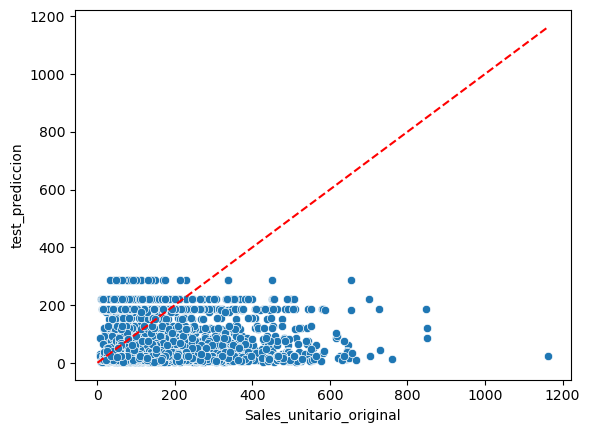

In [144]:
sns.scatterplot(x="Sales_unitario_original", y="test_prediccion", data= df_fin)
plt.plot([df_fin["Sales_unitario_original"].min(), df_fin["Sales_unitario_original"].max()],
         [df_fin["Sales_unitario_original"].min(), df_fin["Sales_unitario_original"].max()],
         color='red', linestyle='--', label='x = y')

***CONCLUSIONES DE ESTE MODELO 2 PARA INTENTAR MEJORAR***  
  
- Este modelo 2 me predice mal los Sales_unitario mayores a 300 aproximadamente (me predice los precios unitarios caros como baratos)  y un poco los Sales_unitario menores a 200 (algunos precios unitarios baratos me los predice como caros)  
